In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def displayImage(image, title='Original Img', colored=None):
    plt.figure(figsize=(10, 10))
    if colored:
        plt.imshow(image[:,:,::-1]) # converting from bgr to rgb
    else:
        plt.imshow(image, cmap='gray')
    plt.axis("off")
    plt.title(title)
    plt.show()
    img = cv2.imread(r'C:\Users\navee\OneDrive\Videos\Image Segmentation & Edge Detection\one piece.jpg')

print (img.shape)
if img is None:
    print("Image not found.")
    exit()

(1080, 1920, 3)


In [8]:
def remove_cluster(image, labels, cluster):
    masked_image = np.copy(image)
    masked_image = masked_image.reshape((-1, 3))

    masked_image[labels == cluster] = 0
    masked_image = masked_image.reshape(image.shape)
    return masked_image

def get_clusters(image, k=2):
    pixel_values = pixel_values = img.reshape((-1, 3)).astype(np.float32)

    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
    _, labels, (centers) = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

    centers = np.uint8(centers)
    labels = labels.flatten()

    segmented_img = centers[labels.flatten()]
    segmented_img = segmented_img.reshape(img.shape)

    return segmented_img, labels

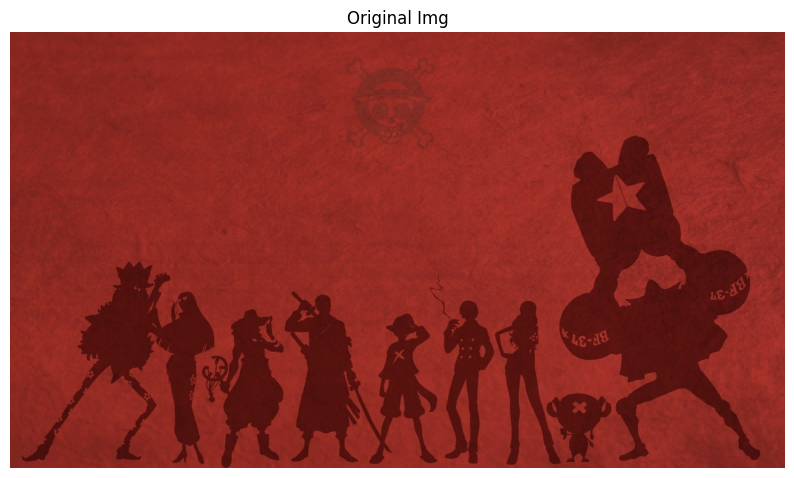

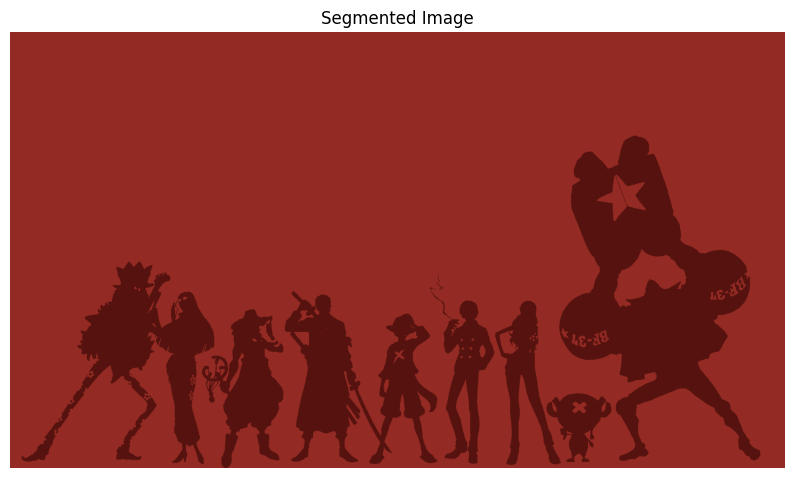

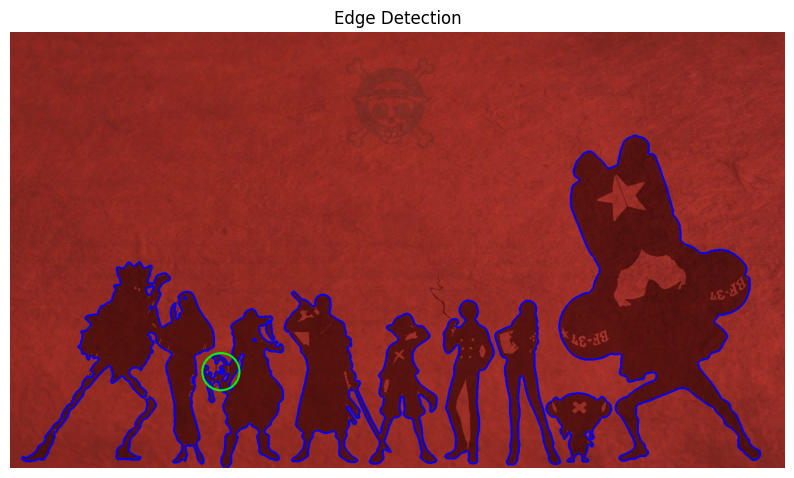

In [5]:
# Reshape for k-means ---------------
pixel_values = img.reshape((-1, 3))
pixel_values = np.float32(pixel_values)

# K-means clustering -------------------
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.1)
k = 2
_, labels, centers = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# Convert back to uint8 and reshape -----
centers = np.uint8(centers)
labels = labels.flatten()
labels = labels.reshape((img.shape[:2]))
segmented_img = centers[labels]

# Blur the segmented image ---------------
bluredImg = cv2.medianBlur(segmented_img, 9)

# Convert to grayscale -------------------
gray = cv2.cvtColor(bluredImg, cv2.COLOR_BGR2GRAY)

# # Removing the shadow cluster (noise) ----
# seg, labels = get_clusters(img, 3)
# rem1 = remove_cluster(img, labels, 0)
# rem2 = remove_cluster(rem1, labels, 1)
# rem = np.bitwise_and(rem1,  rem2)
# displayImage(rem, "rmv Clst" ,colored=1)

# Detect circles ------------------------ // 
circles = cv2.HoughCircles(gray, method=cv2.HOUGH_GRADIENT, dp=1.4, minDist=30, 
                           param1=50, param2=30, minRadius=10, maxRadius=50)

output_img = img.copy()
# edge detection ------------------------------
canny = cv2.Canny(gray, 2, 80)
contours, hierarchy = cv2.findContours(canny, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
cv2.drawContours(output_img, contours, -1, (255, 0, 0), 3)

# Draw Out -------------------------------
if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        center = (i[0], i[1])
        radius = i[2]
        cv2.circle(output_img, center, radius, (0, 255, 0), 3)
        cv2.circle(output_img, center, 3, (255, 0, 0), 3)

# Display --------------------------------
displayImage(img, colored=1)
displayImage(segmented_img, "Segmented Image", colored=1)
displayImage(output_img, "Edge Detection", colored=1)
